In [1]:
# Import necessary Libraries
import torch
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np
loss_list = []
torch.manual_seed(42)

In [2]:
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype = torch.float32)
Y = torch.tensor([0, 1, 1, 0], dtype = torch.float32)

In [3]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        # self.w = torch.nn.Parameter(torch.rand([1]))
        # self.b = torch.nn.Parameter(torch.rand([1]))

        self.linear1 = nn.Linear(2, 2, bias = True)
        self.activation1 = nn.ReLU()
        self.linear2 = nn.Linear(2, 1, bias = True)
        # self.activation2 = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        # x = self.activation2(x)
        return x

In [4]:
class MyDataset(Dataset):
    def __init__(self, X , Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx].to(device), self.Y[idx].to(device)

In [5]:
full_dataset = MyDataset(X, Y)
batch_size = 1
#Create the dataloaders for reading data - # This provides a way to read the dataset in batches, also
# shuffle the data
train_data_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)
#Find if CUDA is available to load the model and device on to the available device CPU/GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#Load the model to GPU
model = XORModel().to(device)
print(model)
#Add the criterion which is the MSELoss
loss_fn = torch.nn.MSELoss()
#Optimizers specified in the torch.optim package
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)

XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): ReLU()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)


In [6]:
def train_one_epoch(epoch_index):
    totalloss = 0.0

    for i, data in enumerate(train_data_loader):

        inputs, labels = data

        optimizer.zero_grad()
    
        outputs = model(inputs)
    
        loss = loss_fn(outputs.flatten(), labels)
        loss.backward()
        optimizer.step()
        totalloss += loss.item()
    
    return totalloss/(len(train_data_loader) * batch_size)

In [7]:
epochs = 10000

for i in range(epochs):

    model.train(True)
    avg_loss = train_one_epoch(i)
    loss_list.append(avg_loss)

    if i % 1000 ==0:
        print(f"{i} / {epochs}, loss: {avg_loss}")

0 / 10000, loss: 0.28828215412795544
1000 / 10000, loss: 0.13222978546400554
2000 / 10000, loss: 0.13277034627981266
3000 / 10000, loss: 0.13273568680347125
4000 / 10000, loss: 0.13273096554848962
5000 / 10000, loss: 0.1327835510719524
6000 / 10000, loss: 0.1328371121908276
7000 / 10000, loss: 0.13272638581878482
8000 / 10000, loss: 0.13273535281267357
9000 / 10000, loss: 0.1324844262948659


('linear1.weight', Parameter containing:
tensor([[ 0.6139,  0.6554],
        [-0.6774,  0.6844]], device='cuda:0', requires_grad=True))
('linear1.bias', Parameter containing:
tensor([-0.6271, -0.0178], device='cuda:0', requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[-0.7764,  0.7782]], device='cuda:0', requires_grad=True))
('linear2.bias', Parameter containing:
tensor([0.4958], device='cuda:0', requires_grad=True))


Input is : tensor([0., 1.], device='cuda:0') 
Output is : tensor([0.9926], device='cuda:0', grad_fn=<ViewBackward0>)


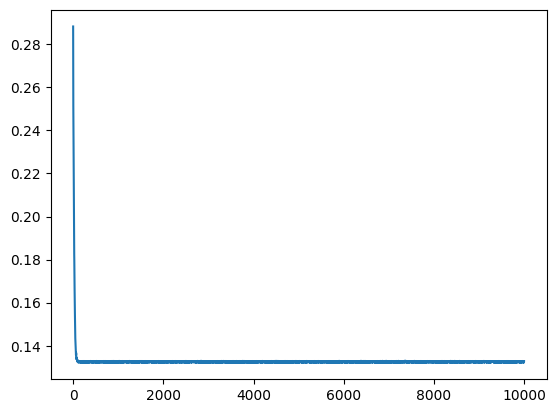

In [8]:
for param in model.named_parameters():
    print(param)
    
input = torch.tensor([0, 1], dtype = torch.float32).to(device)
model.eval()

print(f"\n\nInput is : {input} ")
print(f"Output is : {model(input)}")

plt.plot(loss_list)
plt.show()
# loss_list